# Message Passing Neural Networks (MPNN)


In [2]:
import networkx
import matplotlib.pyplot
import dgl
import mxnet as mx
from mxnet import gluon
import numpy as np

In order to understand MPNN better, let us take a walk back in history and begin with Recurrent Neural Networks or RNN. RNNS were developed in order to conduct sequence modeling. An example of sequence is a 1-D temporal sequence. 
to get a better feeling about what a 1-D temporal sequence is, let's consider an example? I give a sequence of numbers such as: 0, 1, 1, 2, 3, 5, 8, 13, .... What do you expect the next number in the series is? 

Well, if you are familiar with Fibonacci series, then you can guess that the next number is 13+8 = 22. 
How is it achieved? we simply sample sequences of different length, find a pattern, and then apply the pattern on the appropriate sequence length and make a prediction. 

Let's  try a different example from NLP: "Recently, the king of Spain abdicated in favour of his son, Felipe. Felipe is now the new ... king". We unfailingly infer that the next word in indeed "Spanish."

How did we do that? Firstly we used a reference to an earlier part of the sentence. It was after all, the king of *Spain*, who abdicated. It is not hard to images this as a system that the previous state of the system is being carried forward. 

There is another more hidden complexity, inferring *Spain* from *Spanish*. There is a higher dimension relationship, which is related to the inflection. Generally, we seem to be able to infer grammar. I will come back to this point a little later. For now, we are interested in 1-D sequential systems.


$$s^{(t+1)} = f(s^{(t)}; \theta)\qquad(1)$$
where $s$ is representing state of a system at timestep $(t)$. $f$ is a function and $\theta$ is the model parameters. 

We can observe that the systems is always the same, what differs in that the input to the systems is state of the previous run of the system.

This exhibits a recursiveness, which is inherent in dynamical systems and is captured in equation (1); For instance expanding equation 1 for $t=3$, we have:
$$s^{(3)}=f(s^{(2)}, \theta)=f(f(s^{(1)}, \theta), \theta)=f(f(s^{(0)}, \theta), \theta), \theta)$$. If initial state of the system is none, then $$s^{(3)}=f(0, \theta), \theta), \theta)$$.

<img src="./images/dynamicalsystem.png" alt="Image 1: Dynamical System" style="width:325px;height:45px;">


Outside factors could affect a system. If such outside influence at timestep $t$ is $x_t$, then state of a dynamical systems i a function of its previous state, the external factor, and system parameters. Equation 1, is then expanded to include $X=\{x_i\}_{i=0}^{\tau}$ 

$$s^{(t+1)} = f(s^{(t)}, x^{(t+1)}; \theta)\qquad(2)$$

<img src="./images/dynamicalsystemwithinput.png" alt="Image 2: Dynamical System with Outside Influence" style="width:325px;height:97.5px;">


#### 

# Recurrent Neural Networks
The above dynamical system can be modeled using RNNs. RNNS is their simplest form work on the same principle, where the state of the system is the value of its hidden units and model parameters are weights. in Equation 2 we can simply exchange $s$ with $h$ and we have the fundamental description of an RNN.

$$h^{(t+1)} = f(h^{(t)}, x^{(t+1)}; \theta)\qquad(3)$$

<img src="./images/rnnconcept.png" alt="Image 3: Recurrent Neural Networks" style="width:325px;height:97.5px;">


And unrolling remains the same conceptually.

<img src="./images/unrolling.png" alt="Image 3: Recurrent Neural Networks" style="width:455px;height:97.5px;">

## RNN characteristics 
RNNs do have a few interesting characteristics. 1)They produce an output at each timestep, 2)The connection are directional from each timestep to the next, and take and entire sequence and generate a single output.

As we unroll the graph in time, the computational graph provide us what is akin to a feed forwrd network. We can then use back propagation in time in order to train the network and learn parameters $ \theta $.
The propagation equations are defined as:

$$
a^{(t+1)} = b+Wh^{(t)} + Ux^{(t+1)} \qquad(4); \\ 
h^{(t+1)} = tanh(a^{(t+1)}) \qquad(5); \\
o^{(t+1)} = c+Vh^{(t+1)} \qquad(6); \\
\hat{y}^{(t+1)}=softmax(o^{(t+1)}) \qquad(7);
$$

$a$ $b$, and $c$ are bias vectors. $U$, $V$, and $W$ are weight vectors for input-to-input, hidden-to-output, and hidden-to-hidden connections. $\hat{y}$ is the prediction.

<img src="./images/fullrnnunrolled.png" alt="Image 3: Recurrent Neural Networks" style="width:455px;height:250px;">

This model can perhaps capture patterns of  1-D sequential systems such as Fibonacci series, however this is not the case for more complicated problems such as NLP. Take the following example, for instance,


$$
\textit{Teddy Roosevelt was the president of the United States.} \\
\textit{Teddy Bears are popular toys for small children.}
$$

In order to understand who or what the word "Teddy" means in the above example, we need a new type of RNN, a type of RNN that not only can pass the state forward, but also backwards.
Enters bidirectional RNN, which uses a forward pass from left to right and another forward pass from right to left. Training is performed as BPTT (back propagation though time) in both directions.

I want to take you back the example in which inflections were determined, where we inferred Felipe had become the king of **Spain**. In order to enrich RNN to pick out grammatic and other sorts of relationships, embedding and deep RNNs were introduced.

After all of such additions we still can only consume and train data that is sequential and each layer has connections to specif layers. For  instance skip layers are used in forecasting. (ref LSTNet paper)

Most of the rest of the world in not so neatly organized. Relationships are irregular and messy. Tom is a friend of Joe. Joe loves Mary. Mary like apple. Tom is Mary's brother. Tom and Mary are vegetarians. Potato is a vegetable. Tom and Mary, and Joe like melted cheese. Putine is made of gravy, potato, and melted cheese.
Is it likely that next time Tom visits Mary and Joe they would make some Putine? Well... I hope not. We can see that all three of our protagonists are vegetarians, poutine contains gravy and gravy contains meat. 

This simple body of knowledge describes intricate relationships between the entities it describes, namely Mary, Joe, Tom, potato, cheese, and putine. There are several types of relationships. Love, siblings, containments, and liking.

There are also assumptions that are not included in the body of knowledge. Does Mary know that Joe loves her? Does she reciprocate Joe's feelings? Are they a couple? Can we infer from similar connections from others, whom are not describes in this body of knowledge, anything about Joe and Mary based on similarities in the mesh of relationships they have with one another? 



## Modeling the knowledge graph
Let us try to model the world that describes Tom, Marry, Joe, and their preferences and relationships.
<figure>
    <img src="./images/tomnmarry.png" alt="Image 3: Recurrent Neural Networks" style="width:700px;height:700px;" align='topleft'>
    <figcaption>Fig (6): The world of Tom, Marry, and Joe</figcaption>
</figure>




Sadly major branches of deep learning do not have a good answer to this problem as deep learning models accept structures and mostly fixed size input data. The more structured the data, the more the models excel. 

Despair not, rejoice, all is not lost. Amidst the sound of lyre and roars of thunder, riding a donkey and wielding a proverbial hammer and anvil, enters the new Olympian to rescue, enters Deep Learning on Graphs.

# Deep Learning on Graphs
The story of Mary, Joe, and Tom, provides us with the motivation as why we need to accommodate a less structured data to model the world around us, specially when it comes to capturing knowledge. There is an abundance of examples to justify Graph data structure to capture information. One of the first domains to explore graph neural networks were making predictions about molecules. Molecules are composed of atoms and bindings between those atoms. Different atoms have different properties like charge and mass. Atoms influence one another. Intra connections in a molecule and inter-molecular connectivity comes in various forms. 

In the following sections we will explore GNN and its variants; but before proceeding with GNN, let us review some of the fundamentals of graph theory and the glossary that is required in order to sail smoothly though GNN literature.

# References
1- Deeplearning good fella

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Supporting Material


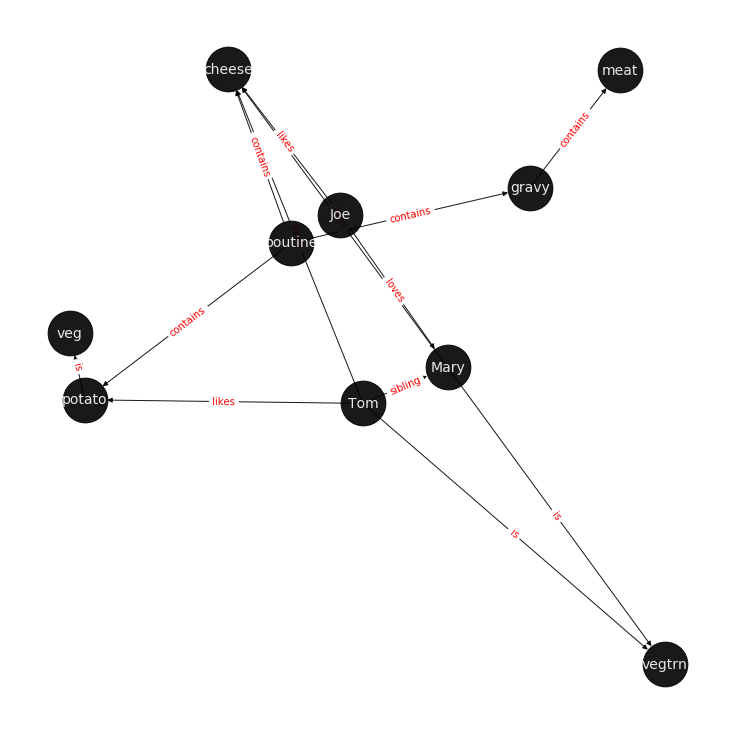

In [9]:
DG = nx.DiGraph()
#DG.add_nodes_from(('Mary', 'Tom','Joe', 'potato', 'putine', 'cheese'))
DG.add_edges_from([('Joe','Mary'), 
                   ('Tom','Mary'), 
                   ('poutine', 'cheese'), 
                   ('poutine', 'gravy'), 
                   ('potato', 'veg'),
                   ('poutine', 'potato'),
                   ('Tom', 'potato'),
                   ('gravy', 'meat'),
                   ('Tom', 'vegtrn'),
                   ('Tom', 'cheese'),
                   ('Mary', 'cheese'),
                   ('Joe', 'cheese'),
                   ('Mary', 'vegtrn')], length=8)
edge_labels = {('Joe','Mary'): 'loves',
               ('Tom', 'Mary'):'sibling',
               ('poutine', 'cheese'):'contains', 
               ('poutine', 'gravy'):'contains', 
               ('potato', 'veg'):'is',
               ('poutine', 'potato'): 'contains',
               ('Tom', 'potato'): 'likes',
               ('Tom', 'cheese'): 'likes',
               ('Joe', 'cheese'): 'likes',
               ('Mary', 'cheese'): 'likes',
               ('gravy', 'meat'): 'contains',
               ('Tom', 'vegtrn'): 'is',
               ('Mary', 'vegtrn'):'is'}
#labels={node:node for node in DG.nodes()}
pos = nx.spring_layout(DG)
plt.figure(figsize=(10,10))  
nx.draw(DG,pos=pos, edge_color='black',width=1,linewidths=1,
        node_size=2000,node_color='black',alpha=0.9, font_color='w', font_size=14,
        labels={node:node for node in DG.nodes()})
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels,font_color='red')
plt.axis('off')
plt.show()